# Resolução exercício Telecom parte A

## Localização antena A B C

### Instalação e carregamento das bibliotecas de GA em python

In [1]:
!pip install deap

     |████████████████████████████████| 160 kB 5.3 MB/s 


In [2]:
import random
import numpy
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import math

### Declaração das funções auxiliares que devem conter as informações do problema

In [4]:
# Função Objetivo -> Repare que o único parametro que a função deve receber é um individuo
def LucroClientes(individual):
  xA = individual[0]
  yA= individual[1]
  xB = individual[2]
  yB = individual[3]
  xC = individual[4]
  yC = individual[5]
  alcanceA = 15
  alcanceB = 12
  alcanceC = 3
  cidadesAtendidasAntenaA = []
  cidadesAtendidasAntenaB = []
  cidadesAtendidasAntenaC = []
  cidadesAtendidas = []
  clientesPorCidade = [7571, 5274, 11082, 11879, 9226, 7942, 6295, 4286, 8132, 11344]
  localizacaoCidades = [(18, 42), (29, 37), (36, 28), (35, 11), (28, 7), (21,15), (8, 26), (18, 31), (6, 4), (50, 46)]
  soma_clientes = 0        
  for localizacaoCidade in localizacaoCidades:
    if((math.sqrt(((xA-localizacaoCidade[0])**2) + ((yA-localizacaoCidade[1])**2)) <= alcanceA)):
      cidadesAtendidasAntenaA.append(1)
    else:
      cidadesAtendidasAntenaA.append(0)
    if((math.sqrt(((xB-localizacaoCidade[0])**2) + ((yB-localizacaoCidade[1])**2)) <= alcanceB)):
      cidadesAtendidasAntenaB.append(1)
    else:
      cidadesAtendidasAntenaB.append(0)
    if((math.sqrt(((xC-localizacaoCidade[0])**2) + ((yC-localizacaoCidade[1])**2)) <= alcanceC)):
      cidadesAtendidasAntenaC.append(1)
    else:
      cidadesAtendidasAntenaC.append(0)
  for i in range(len(cidadesAtendidasAntenaA)):
    if((cidadesAtendidasAntenaA[i] == 1) or (cidadesAtendidasAntenaB[i] == 1) or (cidadesAtendidasAntenaC[i] == 1)):
      cidadesAtendidas.append(True)
    else:
      cidadesAtendidas.append(False)
  i = 0
  for cidadeAtendida in cidadesAtendidas:
    if(cidadeAtendida):
      soma_clientes = soma_clientes + clientesPorCidade[i]
    i = i + 1
  return (soma_clientes,)

In [5]:
# Função de restrição que o problema tiver (nem todos os problemas contém restrições)
def FuncaoDeRestricao(individual):
  return True

In [6]:
# Função utilizada para gerar os individuos -> Repare que não há nenhum mistério, os valores v1 e v2 utilizam a função que é passada por parâmetro que por sua vez
# é uma função que gera numeros aleatorios inteiros entre 0 e 50, como está declarado mais abaixo
# outro ponto importante é como fazer a declaração do cromossomo, procure sempre utilizar tal forma como está decrito, para cada valor, adicionar (append) o mesmo ao cromossomo
# GeradorDeIndividuos(ClasseDoIndividuo, FunçãoDeGeraçãoDeNºAleatorio):
def GeradorDeIndividuos(icls, attr_bool_function):
  i = 0
  cromossomo = list()
  # while True: 
  v1 = attr_bool_function()
  v2 = attr_bool_function()
  v3 = attr_bool_function()
  v4 = attr_bool_function()
  v5 = attr_bool_function()
  v6 = attr_bool_function()
    # if FuncaoDeRestricao(v1, v2, v3, v4, v5, v6):
    #   break
    # i = i + 1
  cromossomo.append(v1)
  cromossomo.append(v2)
  cromossomo.append(v3)
  cromossomo.append(v4)
  cromossomo.append(v5)
  cromossomo.append(v6)
  return icls(cromossomo)

### Declaração dos pacotes referentes a biblioteca do GA: 
#### Nomenclatura referente a biblioteca e deve-se alterar somente os pesos das funções que deverão ser, ou maximizada ou minimizada
#### Pode-se alterar também o tipo da variavel do Individuo. Mas que, geralmente, é uma lista de numeros inteiros

In [7]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [8]:
toolbox = base.Toolbox()
# Definir o gerador de numeros aleatórios de numeros inteiros entre o intervalo (0 e 50)
toolbox.register("aleatorio", random.randint, 0, 50)
# Inicialização do cromossomo (quantos genes o cromossomo deve possuir)
toolbox.register("individual", GeradorDeIndividuos, creator.Individual, toolbox.aleatorio)
# Registro do individuo na população
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# Registro do nome da função objetivo
toolbox.register("evaluate", LucroClientes)
# Registro de qual o tipo de cruzamento deve ser utilizado (cruzamento de 2 pontos)
toolbox.register("mate", tools.cxTwoPoint)
# Registro de qual tipo de mutação deve ser utilizado (probabilidade de um individuo sofrer mutação)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.15)
# Registro de qual o tipo do método de seleção que será utilizado
toolbox.register("select", tools.selBest)

## Chamada efetiva do GA para resolução

In [11]:
population = toolbox.population(n=1000)
# quantidade de gerações
NGEN=50
bestIndEachGeneration = []
bestInd = []
for gen in range(NGEN):
  print("Geracao: ", gen)
  offspring = algorithms.varAnd(population, toolbox, cxpb=0.8, mutpb=0.2)
  fits = list(toolbox.map(toolbox.evaluate, offspring))
  
  indexes = range(len(offspring))
  indexes = [x for _,x in sorted(zip(fits, indexes))]
  fits = [fits[x] for x in indexes]
  offspring = [offspring[x] for x in indexes]
  print(offspring)
  print(fits)
  for fit, ind in zip(fits, offspring):
    ind.fitness.wvalues = fit
  elites_ind = offspring[:max(1, round(0.15*len(offspring)))]
  population = toolbox.select(offspring, len(population)-len(elites_ind))
  population.extend(elites_ind)
  bestIndEachGeneration.append([offspring[fits.index(max(fits))], max(fits)])
  bestInd.append(max(bestIndEachGeneration, key=lambda t:t[1])[1])
  print(" Melhor Avaliação dessa geração: ", bestIndEachGeneration[-1][1], "\n", 
        "Melhor Avaliação Geral", max(bestIndEachGeneration, key=lambda t:t[1])[1], "\n",
        "Da geração: ", bestIndEachGeneration.index(max(bestIndEachGeneration, key=lambda t:t[1])), "\n",
        "Cromossomo: ", max(bestIndEachGeneration, key=lambda t:t[1])[0], "\n"
       )

Geracao:  0
[[2, 42, 0, 37, 14, 39], [0, 45, 0, 38, 14, 0], [0, 42, 34, 48, 37, 6], [32, 50, 3, 42, 2, 46], [3, 45, 38, 44, 6, 8], [35, 50, 5, 42, 30, 28], [2, 39, 1, 16, 2, 18], [0, 28, 0, 49, 31, 0], [0, 22, 0, 19, 45, 29], [47, 1, 10, 21, 42, 44], [49, 18, 0, 26, 0, 26], [0, 23, 6, 25, 0, 38], [50, 8, 5, 30, 35, 31], [10, 45, 1, 15, 44, 24], [7, 49, 48, 26, 11, 18], [9, 48, 46, 17, 46, 32], [5, 43, 21, 50, 46, 30], [10, 47, 50, 3, 5, 23], [15, 47, 48, 22, 27, 3], [3, 2, 0, 0, 0, 18], [10, 0, 0, 4, 47, 17], [0, 5, 0, 39, 23, 26], [2, 2, 13, 5, 44, 31], [0, 10, 4, 12, 39, 9], [3, 8, 0, 4, 4, 34], [9, 0, 3, 10, 32, 24], [12, 2, 7, 7, 40, 46], [8, 0, 16, 0, 1, 1], [10, 4, 6, 44, 2, 34], [6, 0, 47, 14, 9, 13], [50, 6, 6, 0, 31, 17], [3, 9, 0, 14, 39, 18], [0, 0, 6, 39, 12, 21], [10, 0, 2, 2, 47, 14], [2, 5, 3, 46, 25, 44], [3, 10, 2, 5, 28, 1], [1, 40, 29, 0, 0, 1], [1, 47, 22, 30, 29, 28], [6, 22, 45, 20, 26, 18], [5, 30, 10, 31, 4, 27], [6, 25, 0, 26, 22, 25], [4, 27, 31, 49, 1, 29], [

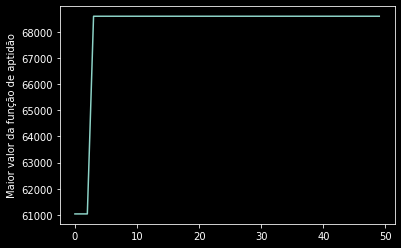

In [12]:
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt
plt.plot(bestInd)
plt.ylabel('Maior valor da função de aptidão')
plt.show()